## Dataset - Insurance


## **Need for the study:**

Tentative Business Problem- 
    
There is an insurance company and they would like to know which category of people are claiming insurance. An insurance claim is a formal request by a policyholder to an insurance company for coverage or compensation for a covered loss or policy event. We wish to predict the insurance claim of a person based on their general health and demographic conditions. Then we would like to classify whether a person is seeking a high claim- 15,000 $.

------> Premiums will be decided based on the predicted claims - A very important application of predicting the possible claim 

## **Initial hypothesis on the Columns: Hypothesis Generation**

The dataset consists of 1340 patients, and their general health conditions. There are various factors corroborated to claim insurance from the company.

**age:** 
The patients ages vary from 18 to 60. Almost 50% lie from 29- 47 ages. We can hypothesise that senior citizens are more prone to claim the insurance.

**gender:**
There appear to be approximately equal number of males and females. Generally females have higher life expectancy. So we have to check whether the insurance claim is gender specific or not.  



**bmi:**
The average bmi range for healthy people is 18.5—24.9. So the patients above (and below) the healthy range might claim higher insurance amount due to their obesity/ underweight.  


**bloodpressure**
For 19- 40 years of age, the blood pressure should be between 90-120 mm Hg. The patients not belonging to these ranges might have higher probability of claiming insurance.  

**diabetic**
Diabetes is a general sign of poor health and malaise. The patients with diabetes might claim higher insurance.


**children:**
The number of children of the patient indicates the number of dependents on the person. We can hypothesise that the number of dependents is directly proportional to the insurance amount claimed.

**smoker:**
Smoking is injurious to health and can cause health complications. We can find out whether smoking leads to higher insurance claims or not.  


**region:**
Patients of the same region might have similar patterns to insurance claims. We can find out which region has higher number of customers. We can hypothesise that the average claims of all the regions are equal.


**claim:**
This can be our target variable for the business problem. We wish to find out the impact of the aforementioned features on the insurance claims.



## **Evaluation Criteria**

Since the problem appears to be Classification analysis, we can evaluate the target as 'Claim', based on Precision and Recall, or F1 Score to be better. The corresponding AUC-ROC can also be noted. 

In [1]:
#Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import libray for linear regression
from sklearn.linear_model import LinearRegression
#importing from calculating R-score
from sklearn.metrics import r2_score

from scipy import stats

from   statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#For plotting a decision tree
from sklearn import tree

#For getting the r_score value
from sklearn.metrics import r2_score

#For cross validation
from sklearn.model_selection import cross_val_score


In [8]:
os.chdir(r'/Users/tejas/Downloads')
data = pd.read_csv('insurance_data.csv')
data.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [9]:
data.columns

Index(['PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic',
       'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [10]:
data["claim"]= data["claim"].apply(lambda x:'High' if x>15000 else 'Low')

In [11]:
data.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,Low
1,2,24.0,male,30.1,87,No,0,No,southeast,Low
2,3,NaN,male,33.3,82,Yes,0,No,southeast,Low
3,4,NaN,male,33.7,80,No,0,No,northwest,Low
4,5,NaN,male,34.1,100,No,0,No,northwest,Low


In [12]:
data.dtypes

PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim             object
dtype: object

In [13]:
data.isnull().sum()

PatientID         0
age               5
gender            0
bmi               0
bloodpressure     0
diabetic          0
children          0
smoker            0
region           17
claim             0
dtype: int64

In [14]:
data.shape

(1340, 10)

In [15]:
data.region.mode()

0    southeast
dtype: object

## **Data Cleaning**

Data appreciation
•	Relevance, quality, availability of data

The dataset is quite relevant for evaluating the insurance claims as it involves the health and general conditions of the patient. However, there are few null values especially in ages and region. We would need to appropriately modify the data before having a further analysis and Hypothesis Testing.

There could be further availability of data regarding Patient/Family income, Working status, Type of Insurance and so on.

Since, there are 5 null values in age, and 17 null values in region, they can be modified for further analysis.


In [172]:
data

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,claim_status
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Low
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Low
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94,Low
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40,Low
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01,Low
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40,High
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07,High
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40,High
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87,High


In [16]:
data= data.dropna(subset=['age'])        #for removing null values

In [17]:
data.isnull().sum()

PatientID         0
age               0
gender            0
bmi               0
bloodpressure     0
diabetic          0
children          0
smoker            0
region           17
claim             0
dtype: int64

In [175]:
data.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,claim_status
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87,Low
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51,Low
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80,Low
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40,Low
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46,Low


In [ ]:
data = data.drop(['PatientID'], axis = 1)

In [26]:
data= data.fillna(data.region.mode()[0])

In [28]:
data.isnull().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [29]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,Low
1,24.0,male,30.1,87,No,0,No,southeast,Low
7,19.0,male,41.1,100,No,0,No,northwest,Low
8,20.0,male,43.0,86,No,0,No,northwest,Low
9,30.0,male,53.1,97,No,0,No,northwest,Low


# **Univariate Analysis**

In [186]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim_status
0,39.0,male,23.2,91,Yes,0,No,southeast,Low
1,24.0,male,30.1,87,No,0,No,southeast,Low
7,19.0,male,41.1,100,No,0,No,northwest,Low
8,20.0,male,43.0,86,No,0,No,northwest,Low
9,30.0,male,53.1,97,No,0,No,northwest,Low


In [31]:
#Identifying the feasible features from the dataset
#Numerical and Continuous
numerical = ['age','bmi','bloodpressure']

#Categorical and Discrete
categorical = ['gender','diabetic','children','smoker', 'region','claim']

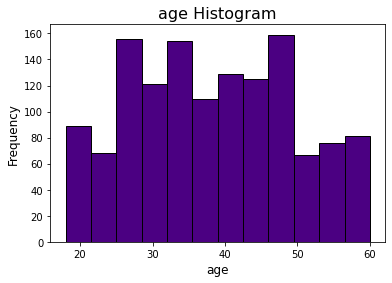

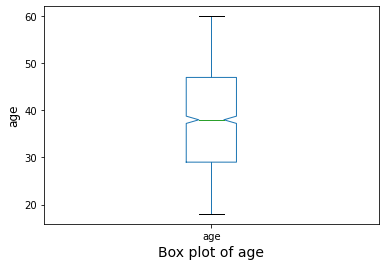

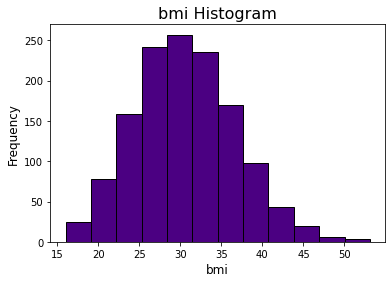

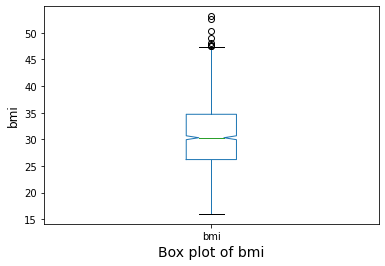

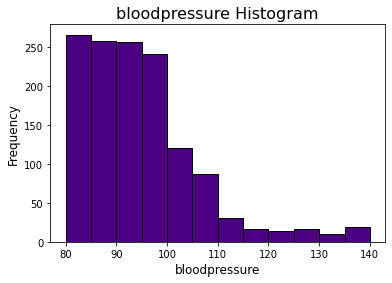

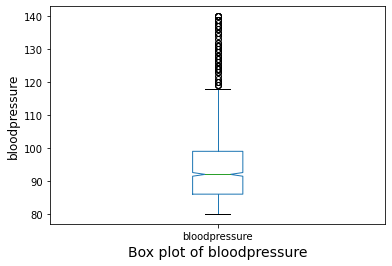

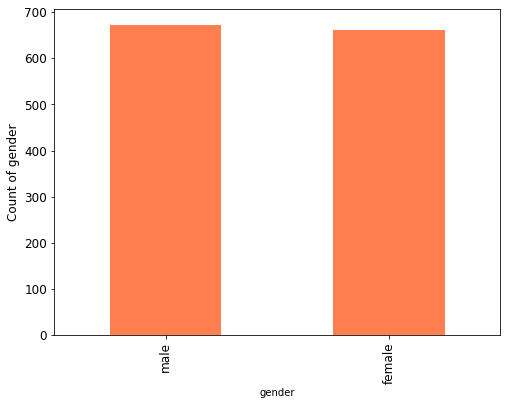

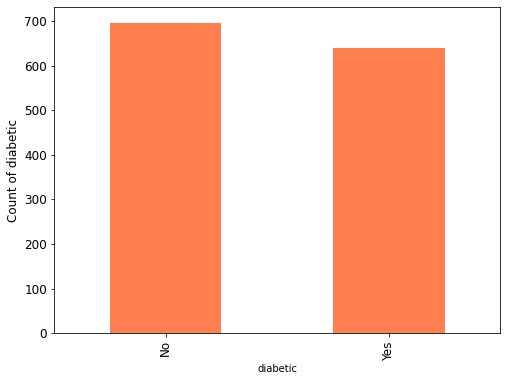

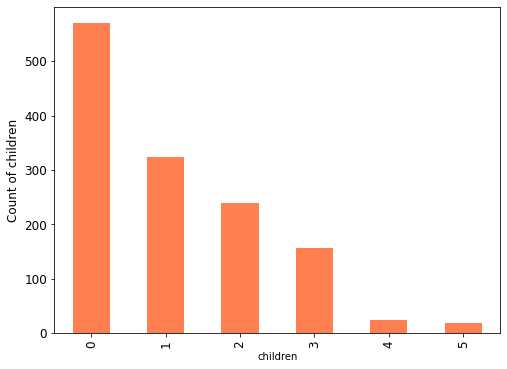

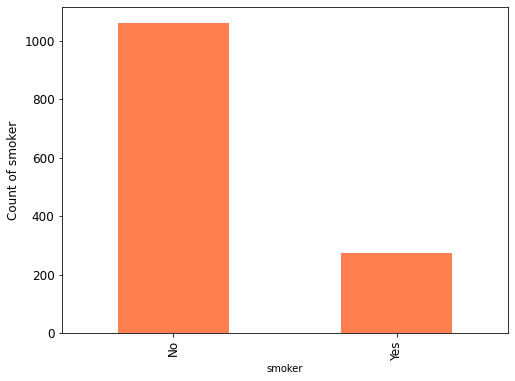

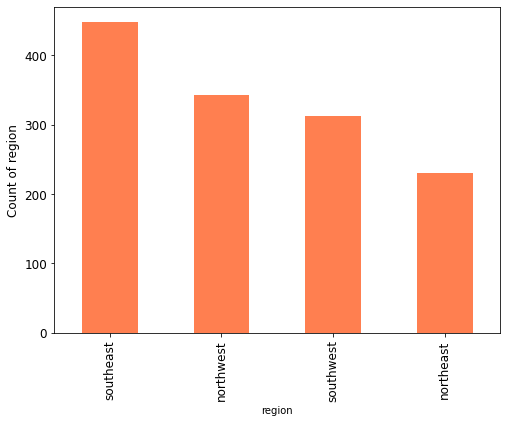

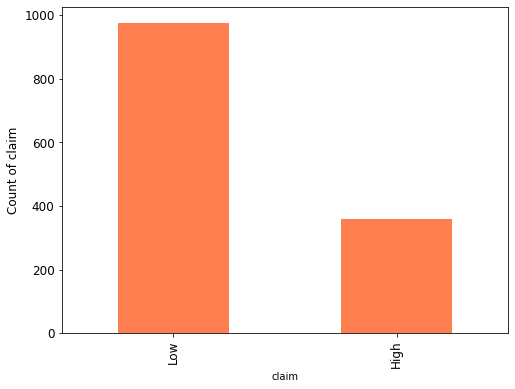

In [32]:
#Univariate Analysis
for feature in numerical:
        
        #Creating Histograms for numerical and continuous columns
        data.hist(column=feature,
                 grid=False,
                 figsize=(6,4),
                 color="indigo",
                 edgecolor="black",
                 bins=12)  #Creating histograms for numerical columns

        plt.xlabel(feature,fontsize=12) #Title of x-axis
        plt.ylabel("Frequency",fontsize=12) #Title of y-axis
        plt.title(feature +" Histogram",fontsize=16)  #Title of histogram
               
        
        #Creating Boxplots for numerical and continuous columns
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        ax = np.reshape(ax, (1, 1)) #Reshaping the axis
        data.boxplot(column = feature, notch = True,
             grid = False,
            figsize = (8,6))     #Creating boxplot for numerical columns  

        plt.ylabel(feature, fontsize = 12) #Title of y-axis
        plt.xlabel("Box plot of "+feature, fontsize = 14) #Title of x-axis
       
        
    #Creating Barplots for categorical and discrete features
for feature in categorical:
        fig, ax = plt.subplots(1, 1) #Assigning subplots
        data[feature].value_counts().plot(kind='bar', figsize=(8,6), color="coral", fontsize=12) #Creating barplot for categorical columns
        plt.xlabel(feature, fontsize=10) #Title of x-axis
        plt.ylabel("Count of "+feature, fontsize=12) #Title of y-axis
       

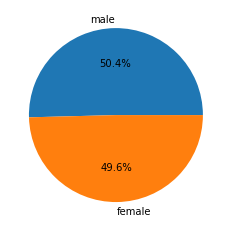

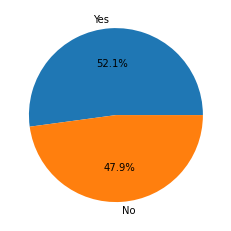

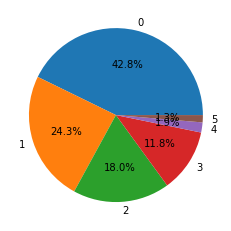

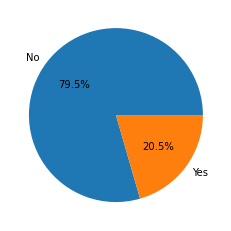

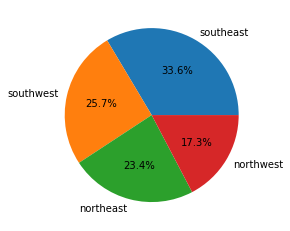

In [33]:
# Pie Charts for categorical values

labels = ['male', 'female']
plt.pie(data.gender.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

labels = ['Yes', 'No']
plt.pie(data.diabetic.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

labels = ['0', '1','2','3','4','5']
plt.pie(data.children.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

labels = ['No','Yes']
plt.pie(data.smoker.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

labels = ['southeast','southwest','northeast','northwest']
plt.pie(data.region.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

**Binning few variables to get a better picture:**

In [34]:
#BMI:

bins=[0,18.5, 24.9, 100] 
group= ['Low', 'Average','High']
        
data['bmi_bin']= pd.cut(data['bmi'], bins, labels= group)

In [35]:
data['bmi_bin']

0       Average
1          High
7          High
8          High
9          High
         ...   
1335       High
1336       High
1337       High
1338       High
1339       High
Name: bmi_bin, Length: 1335, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

<AxesSubplot:xlabel='bmi_bin', ylabel='count'>

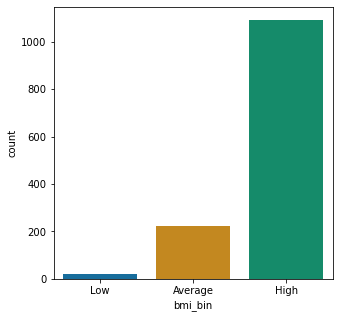

In [36]:
plt.subplots (figsize=(5,5))
sns.countplot (x='bmi_bin', data= data, palette = 'colorblind')

In [37]:
#BP:

bins=[0,90, 120, 200] 
group= ['Low', 'Average','High']
        
data['bp_bin']= pd.cut(data['bloodpressure'], bins, labels= group)

<AxesSubplot:xlabel='bp_bin', ylabel='count'>

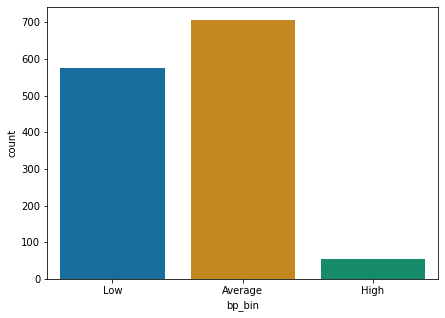

In [38]:
plt.subplots (figsize=(7, 5))
sns.countplot (x='bp_bin', data= data, palette = 'colorblind')

*where distributions of variables are skewed in the sense that some sets of values will occur a lot and some will be very rare. Directly using this type of feature may cause issues or can give inaccurate results. so we are converting contineous variable into discrete variable by categorizing them into a range. It prevents overfitting and increases the robustness of the model.*

In [39]:
data.shape

(1335, 11)

## **Observations and Questions from Univariate Analysis**

The dataset consists of 1335 patients, and their general health conditions. There are various factors corroborated to claim insurance from the company.

**Age:** 
The patients ages vary from 18 to 60. Almost 50% lie from 29- 47 ages. It appears to be a uniform distribution.   
Further question: Whether elderly have higher claim amounts?

**Gender:**
There appear to be approximately equal number of males and females.   
We can further check whether the insurance claim is gender specific or not?

**BMI:**
The average bmi range for healthy people is 18.5—24.9. So the patients above (and below) the healthy range might claim higher insurance amount due to their obesity/ underweight.
BMI appears to be normally distributed, with slightly positively skewness.  A higher proportion fall in high BMI region.
Further question: Is BMI correlated with higher claim amounts?


**Blood pressure**
The patients not belonging to the ideal ranges of (90-120) might have higher probability of claiming insurance.
It is Significantly positively skewed, owing to the high number of outliers. A higher proportion fall in average BP range.
Further question: Is non-ideal BP correlated with higher claim amounts?

**Diabetic**
Diabetes is a general sign of poor health and malaise. The patients with diabetes might claim higher insurance.
There is 52.1% of patients who are diabetic, and 47.9% of patients who are not. Nothing significant can be concluded from here. So we need further analysis on this.  
Further question: Do diabetic people have higher claim amounts than non-diabetic?

**Children:**
The number of children of the patient indicates the number of dependents on the person. We can hypothesise that the number of dependents is directly proportional to the insurance amount claimed.
Almost 43% of patients have no children. The other majority viz. 24% & 18% are single child or two child parents. There can be seen that a very less percentage of patients have more than 2 children.
It can also be concluded that Approximately 57% of the patients can be married. Since their could be single parents, or married couples with no children. We can observe further by doing bi-variate analysis.

**Smoker:**
Smoking is injurious to health and can cause health complications. 
Almost 79% of patients are non-smokers, and the remaining 21% of the patients are smokers. We need to do a further analysis on this as smoking may lead to smoking leads to higher insurance claims.  
Further question: Do smoker have higher average claim amounts than non-smokers?

**Region:**
Patients of the same region might have similar patterns to insurance claims. We can find out which region has higher number of customers.
We can see that, there is a higher number of patients in Southeast region. Data is almost representative from all the regions.  
Further question: Which region has a higher/lower claim amount?

**Claim_status:**
This is our target variable for the business problem. We wish to find out the impact of the aforementioned features on the insurance claims.

# **Bi - Variate**  Hypothesis Testing

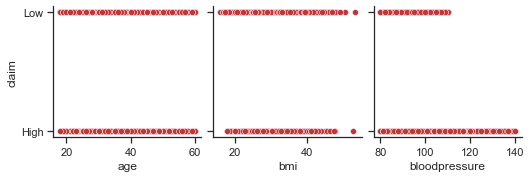

In [40]:
#Bivariate analysis of claim and numerical variables
sns.set(style="ticks", color_codes=True,palette='RdBu')
sns.pairplot(data=data,
                  y_vars=['claim'],
                  x_vars=['age','bmi','bloodpressure'])

* Age does not seem to be a correlated with value to claim.
* We can say, healthy group of BMIs ranging from 18.5 - 24.9 have claimed insurance, but  the claim amount doesn't seem to be higher.

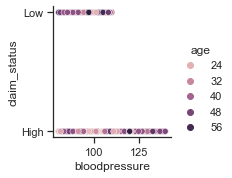

In [198]:
sns.set(style="ticks", color_codes=True, palette="rainbow")
sns.pairplot(data=data,
                  y_vars=['claim_status'],
                  x_vars=['bloodpressure'], hue='age')

Even from the multivariate analysis, we cannot see a direct impact of numerical columns on claim.

In [47]:
table = pd.crosstab(data.age,columns = data.claim)
table

claim,High,Low
age,,
18.0,2,14
19.0,11,18
20.0,9,17
21.0,6,12
22.0,15,9
23.0,8,20
24.0,2,14
25.0,7,25
26.0,11,36


<AxesSubplot:xlabel='age', ylabel='count'>

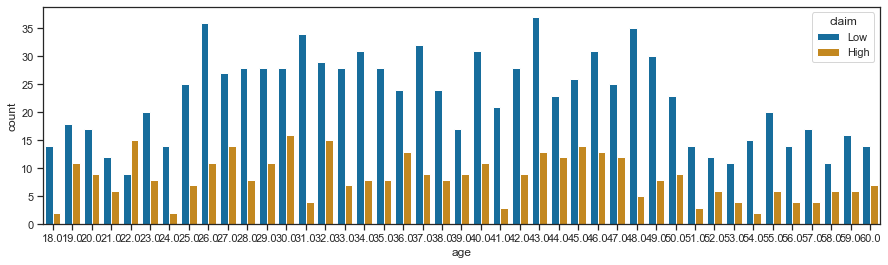

In [48]:
plt.subplots (figsize=(15,4))
sns.countplot (x='age',  hue='claim', data= data, palette = 'colorblind')

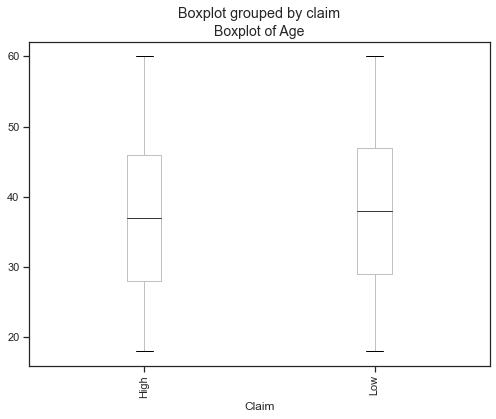

In [49]:
data.boxplot(column="age",
             by="claim",
            grid=False,
            figsize=(8,6),
            rot=90)   #The angle by which you want to rotate the label

plt.xlabel("Claim", fontsize=12)
plt.title("Boxplot of Age", fontsize=14)
plt.show()

In [50]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin
0,39.0,male,23.2,91,Yes,0,No,southeast,Low,Average,Average
1,24.0,male,30.1,87,No,0,No,southeast,Low,High,Low
7,19.0,male,41.1,100,No,0,No,northwest,Low,High,Average
8,20.0,male,43.0,86,No,0,No,northwest,Low,High,Low
9,30.0,male,53.1,97,No,0,No,northwest,Low,High,Average


In [ ]:
#Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

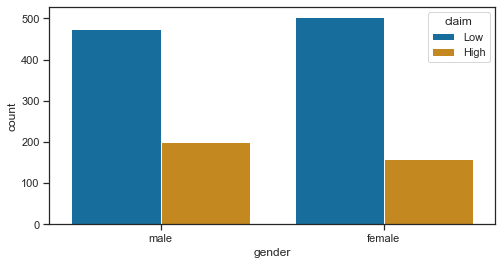

In [51]:
plt.subplots (figsize=(8,4))
sns.countplot (x='gender',  hue='claim', data= data, palette = 'colorblind')

In [72]:
tab= pd.crosstab(data.gender, columns= data.claim)
tab

claim,High,Low
gender,,
female,159,503
male,199,474


#Since there appears a pattern between gender and claims, we can test with Chi Square test of Independence.

In [77]:
## **H0: There is no dependency in claims and gender** i.e claims is equal for both genders.
## **Ha: There is dependency in claims and gender** i.e claims is not equal for the genders



In [73]:
import numpy       as np
import scipy.stats as stats

gender_array = np.array([[159,503],[199,474]])

gender_array

array([[159, 503],
       [199, 474]])

In [74]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

gender_array = np.array([[159,503],[199,474]])

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(gender_array, correction=False)
stats.chi2_contingency(gender_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
df = (2-1)*(2-1)
print("critical value is ", stats.chi2.isf(0.05, df))

Chi-square statistic 5.23979 P value 0.022076 Degrees of freedom 1
critical value is  3.8414588206941285


#### Chi-square_stat > chi_Critical so we reject the null hypthesis and conclude that there is dependency between claims and gender.
#### P-value < alpha so in right tail chi test it falls under rejection zone and we reject our null hypothesis

In [78]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin
0,39.0,male,23.2,91,Yes,0,No,southeast,Low,Average,Average
1,24.0,male,30.1,87,No,0,No,southeast,Low,High,Low
7,19.0,male,41.1,100,No,0,No,northwest,Low,High,Average
8,20.0,male,43.0,86,No,0,No,northwest,Low,High,Low
9,30.0,male,53.1,97,No,0,No,northwest,Low,High,Average


In [ ]:
#Diabetic

In [80]:
data.diabetic.value_counts()

No     696
Yes    639
Name: diabetic, dtype: int64

<AxesSubplot:xlabel='diabetic', ylabel='count'>

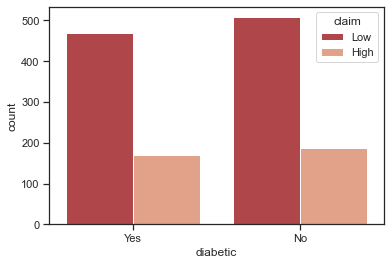

In [81]:
sns.countplot(x= 'diabetic', hue='claim', data=data)

In [ ]:
#There is no discernible trend.

In [83]:
tab_dia= pd.crosstab(data.diabetic, columns= data.claim)
tab_dia

claim,High,Low
diabetic,,
No,188,508
Yes,170,469


In [84]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

dia_array = np.array([[188,508],[170,469]])

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dia_array, correction=False)
stats.chi2_contingency(dia_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
df = (2-1)*(2-1)
print("critical value is ", stats.chi2.isf(0.05, df))

Chi-square statistic 0.02818 P value 0.866691 Degrees of freedom 1
critical value is  3.8414588206941285


#### Chi-square_stat << chi_Critical so we cannot reject the null hypthesis and conclude that there is no dependency between claims and diabetic.
#### P-value < alpha so in right tail chi test it falls under acceptance zone and we cannot reject our null hypothesis

In [85]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin
0,39.0,male,23.2,91,Yes,0,No,southeast,Low,Average,Average
1,24.0,male,30.1,87,No,0,No,southeast,Low,High,Low
7,19.0,male,41.1,100,No,0,No,northwest,Low,High,Average
8,20.0,male,43.0,86,No,0,No,northwest,Low,High,Low
9,30.0,male,53.1,97,No,0,No,northwest,Low,High,Average


In [ ]:
#Children

<AxesSubplot:xlabel='children', ylabel='count'>

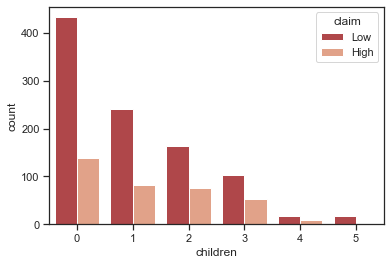

In [88]:
sns.countplot(x= 'children', hue= 'claim', data=data)

In [90]:
tab_child= pd.crosstab(data.children, columns= data.claim)
tab_child

claim,High,Low
children,,
0,138,433
1,82,242
2,76,164
3,53,104
4,8,17
5,1,17


In [91]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

child_array = np.array([[138,433],[82,242],[76,164],[53,104],[8,17],[1,17]])

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(child_array, correction=False)
stats.chi2_contingency(child_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
df = (2-1)*(2-1)
print("critical value is ", stats.chi2.isf(0.05, df))

Chi-square statistic 13.63573 P value 0.018097 Degrees of freedom 5
critical value is  3.8414588206941285


#### Chi-square_stat >> chi_Critical so we reject the null hypthesis and conclude that there is strong dependency between claims and children.
#### P-value < alpha so in right tail chi test it falls under rejection zone and we reject our null hypothesis

In [ ]:
#Smoker

<AxesSubplot:xlabel='smoker', ylabel='count'>

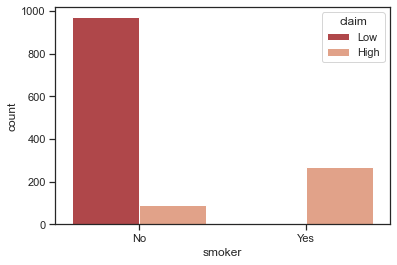

In [92]:
sns.countplot(x='smoker', hue='claim', data=data)

In [94]:
tab_smok= pd.crosstab(data.smoker, columns= data.claim)
tab_smok

claim,High,Low
smoker,,
No,91,970
Yes,267,7


In [95]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

smoker_array = np.array([[91,970],[267,7]])

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(smoker_array, correction=False)
stats.chi2_contingency(smoker_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
df = (2-1)*(2-1)
print("critical value is ", stats.chi2.isf(0.05, df))

Chi-square statistic 876.32408 P value 0.000000 Degrees of freedom 1
critical value is  3.8414588206941285


#### Chi-square_stat >> chi_Critical so we reject the null hypthesis and conclude that there is strong dependency between claims and smoking status.
#### P-value < alpha so in right tail chi test it falls under rejection zone and we reject our null hypothesis

In [96]:
data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,bmi_bin,bp_bin
0,39.0,male,23.2,91,Yes,0,No,southeast,Low,Average,Average
1,24.0,male,30.1,87,No,0,No,southeast,Low,High,Low
7,19.0,male,41.1,100,No,0,No,northwest,Low,High,Average
8,20.0,male,43.0,86,No,0,No,northwest,Low,High,Low
9,30.0,male,53.1,97,No,0,No,northwest,Low,High,Average


<AxesSubplot:xlabel='region', ylabel='count'>

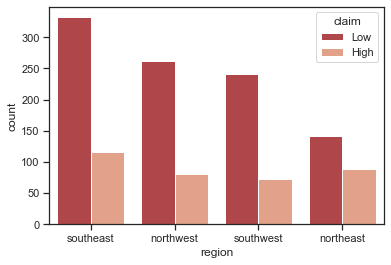

In [97]:
sns.countplot(x='region', hue='claim', data=data)

In [99]:
tab_reg= pd.crosstab(data.region, columns= data.claim)
tab_reg

claim,High,Low
region,,
northeast,89,142
northwest,81,262
southeast,116,332
southwest,72,241


In [100]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

region_array = np.array([[89,142],[81,262],[116,332],[72,241]])

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(region_array, correction=False)
stats.chi2_contingency(region_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
df = (2-1)*(2-1)
print("critical value is ", stats.chi2.isf(0.05, df))

Chi-square statistic 20.44989 P value 0.000137 Degrees of freedom 3
critical value is  3.8414588206941285


#### Chi-square_stat >> chi_Critical so we reject the null hypthesis and conclude that there is strong dependency between claims and smoking status.
#### P-value < alpha so in right tail chi test it falls under rejection zone and we reject our null hypothesis

## Feature Engineering:

**One Hot Encoding of Categorical Values**

* For categorical columns, since it has Yes/No as values, it cannot be used for Model fitting/Machine Learning.

* So it needs to changed into something which a machine can understand, i.e. 0s and 1s.

In [101]:
new_data= pd.get_dummies(data, columns= ["gender", "diabetic", "smoker", "region"], drop_first= True)

In [102]:
new_data.head()

,age,bmi,bloodpressure,children,claim,bmi_bin,bp_bin,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,Low,Average,Average,1,1,0,0,1,0
1,24.0,30.1,87,0,Low,High,Low,1,0,0,0,1,0
7,19.0,41.1,100,0,Low,High,Average,1,0,0,1,0,0
8,20.0,43.0,86,0,Low,High,Low,1,0,0,1,0,0
9,30.0,53.1,97,0,Low,High,Average,1,0,0,1,0,0


In [ ]:
new_data= new_data.drop(['bmi_bin','bp_bin'],axis=1)


In [111]:
new_data

,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,Low,1,1,0,0,1,0
1,24.0,30.1,87,0,Low,1,0,0,0,1,0
7,19.0,41.1,100,0,Low,1,0,0,1,0,0
8,20.0,43.0,86,0,Low,1,0,0,1,0,0
9,30.0,53.1,97,0,Low,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,35.5,88,0,High,0,1,1,1,0,0
1336,59.0,38.1,120,1,High,0,0,1,0,0,0
1337,30.0,34.5,91,3,High,1,1,1,1,0,0
1338,37.0,30.4,106,0,High,1,0,1,0,1,0


In [114]:
data= new_data.copy()

In [115]:
data.head()

,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,Low,1,1,0,0,1,0
1,24.0,30.1,87,0,Low,1,0,0,0,1,0
7,19.0,41.1,100,0,Low,1,0,0,1,0,0
8,20.0,43.0,86,0,Low,1,0,0,1,0,0
9,30.0,53.1,97,0,Low,1,0,0,1,0,0


## Machine Learning Models

In [ ]:
## CART

In [302]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.model_selection import cross_val_score   #Additional scklearn functions
from sklearn import metrics #for accuracy metrix

In [303]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [304]:
#predictors and target
X= data.drop(['claim'],axis=1)
y= data.claim

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [306]:
len(X_train), len(X_test)

(1068, 267)

In [307]:
len(X_train)/len(X)

0.8

In [308]:
#For fitting classifier tree
from sklearn.tree import DecisionTreeClassifier

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

In [309]:
clf_tree = DecisionTreeClassifier() #greedy algorithm
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier()

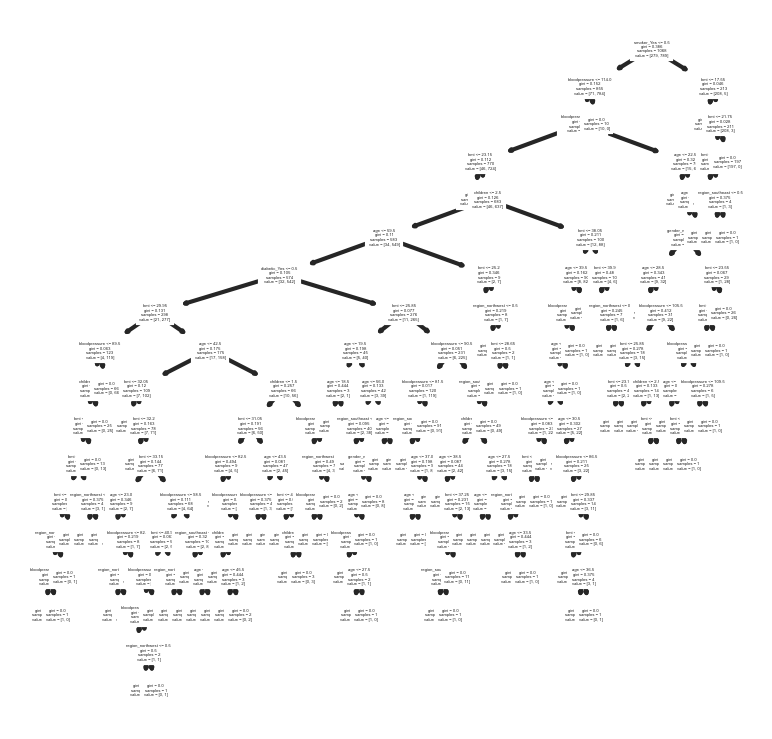

In [310]:
fig, axes = plt.subplots(figsize=(3,3), dpi=300)

tree.plot_tree(clf_tree, feature_names=list(X), filled = False)

plt.show()

In [311]:
#clf_tree = DecisionTreeClassifier() #greedy algorithm
#clf_tree.fit(X_train, y_train)

pred = clf_tree.predict(X_test)
pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High'

In [312]:
len(y_test), len(pred)

(267, 267)

In [313]:
feat = pd.DataFrame({'Feature_names' :X_train.columns, 'Importances': clf_tree.feature_importances_})

In [314]:
feat

,Feature_names,Importances
0,age,0.089828
1,bmi,0.097735
2,bloodpressure,0.092879
3,children,0.016033
4,gender_male,0.004670
5,diabetic_Yes,0.000652
6,smoker_Yes,0.660448
7,region_northwest,0.025835
8,region_southeast,0.008686
9,region_southwest,0.003234


In [315]:
feat.sort_values("Importances")

,Feature_names,Importances
5,diabetic_Yes,0.000652
9,region_southwest,0.003234
4,gender_male,0.004670
8,region_southeast,0.008686
3,children,0.016033
7,region_northwest,0.025835
0,age,0.089828
2,bloodpressure,0.092879
1,bmi,0.097735
6,smoker_Yes,0.660448


In [316]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, pred )
cm

array([[ 62,  17],
       [ 17, 171]], dtype=int64)

In [329]:
#Accuracy
a1= (cm[0,0]+cm[1,1])/ (cm[0,0]+cm[0,1]+ cm[1,0]+cm[1,1])

In [330]:
# Recall/ Sensitivity
r1= (cm[0,0])/ (cm[0,0]+cm[0,1])

In [331]:
# Precision
p1= (cm[0,0])/ (cm[0,0]+cm[1,0])

In [332]:
#Specificity
s1= (cm[1,1])/ (cm[1,0]+cm[1,1])

In [333]:
#F1score:

f1= (2* (r*p))/ (r+p)

In [334]:
a1,r1,p1,s1,f1

(0.8726591760299626,
 0.7848101265822784,
 0.7848101265822784,
 0.9095744680851063,
 0.7848101265822784)

In [339]:
metrics=['Accuracy','Recall', 'Precision', 'Specificity', 'F1 Score']
values1=[a1,r1,p1,s1,f1]

In [340]:
metric = pd.DataFrame({'Metrics' :metrics, 'Values': values1})

In [341]:
metric

,Metrics,Values
0,Accuracy,0.872659
1,Recall,0.784810
2,Precision,0.784810
3,Specificity,0.909574
4,F1 Score,0.784810


In [326]:
### 10 - Cross Validation

#Using Cross-Validation to choose optimal k
depth = list(range(1,15))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth:
    dtr = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dtr, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())

In [327]:
error = [1- x for x in cv_scores]
error

[0.07112502204196791,
 0.061770410862281744,
 0.060835831423029396,
 0.059874801622288865,
 0.05894022218303652,
 0.06926467995062602,
 0.06643449127138079,
 0.07858402398166109,
 0.0767148651031564,
 0.08702168929642029,
 0.08981661082701464,
 0.09823664256744835,
 0.107644154470111,
 0.10856110033503796]

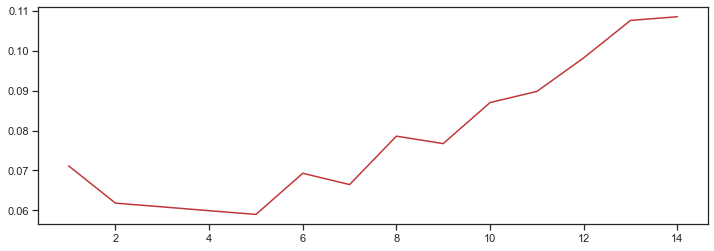

In [328]:
plt.plot(depth, error)
plt.show()   #depth 2

In [209]:
train = data
target = 'claim'

In [210]:
train.shape

(1335, 11)

In [211]:
train[target].value_counts() #Slightly imbalanced

Low     977
High    358
Name: claim, dtype: int64

In [212]:
358/977

0.3664278403275333

In [213]:
train.head()

,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,Low,1,1,0,0,1,0
1,24.0,30.1,87,0,Low,1,0,0,0,1,0
7,19.0,41.1,100,0,Low,1,0,0,1,0,0
8,20.0,43.0,86,0,Low,1,0,0,1,0,0
9,30.0,53.1,97,0,Low,1,0,0,1,0,0


In [214]:
X = train.drop([target], axis=1)
y = train.claim

In [223]:
### A Function for Model Fitting and Evaluation

In [224]:
def modelfit(alg, dtrain, predictors, target, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], 
                                   cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (Train) : %.4g" % metrics.accuracy_score(dtrain[target], dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print ("CV Score (AUROC) : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" 
               % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        

In [225]:
#The list of predictors
predictors = [x for x in train.columns if x not in [target]]

In [226]:
### Decision Tree model (with Default Parameters)

In [227]:
#Decision tree model with default parameters (Letting the model learn without any restrictions)
dtree0 = DecisionTreeClassifier()
modelfit(dtree0, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 1
AUC Score (Train): 1.000000
CV Score (AUROC) : Mean - 0.8190094 | Std - 0.07333405 | Min - 0.7440171 | Max - 0.9315171


In [228]:
#Let's look at the depth of the tree "dtree0"
dtree0.get_depth()

21

**Observations**

1. *Training AUROC nearly 1 (suggest that model has overfitted the data)*
2. *Test AUROC nearly 0.81 (suggests a decent on the validation data)*

**Conclusion**

*The model has probably overfitted the training data due to high variance. The tree can be observed to be fitted deep with a depth of 21.*

In [ ]:
### Decision Tree of Lesser Depth (Decrease depth to reduce variance)

In [229]:
#Depth 15 (train score (decrease) | Validation score (increase)) - Test AUROC = 82.27%
dtree = DecisionTreeClassifier(max_depth=15)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9933
AUC Score (Train): 0.999788
CV Score (AUROC) : Mean - 0.8227822 | Std - 0.07564449 | Min - 0.7594017 | Max - 0.9442664


In [232]:
#Depth 10 (train score (decrease) | Validation score (increase)) - Test AUROC = 83.27%
dtree = DecisionTreeClassifier(max_depth=10)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9603
AUC Score (Train): 0.984298
CV Score (AUROC) : Mean - 0.8326318 | Std - 0.08672328 | Min - 0.7508982 | Max - 0.9543091


In [233]:
#Depth 9 (train score (decrease) | Validation score (increase)) - Test AUROC = 83.68%
dtree = DecisionTreeClassifier(max_depth=9)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9551
AUC Score (Train): 0.973578
CV Score (AUROC) : Mean - 0.8368681 | Std - 0.09642642 | Min - 0.7399037 | Max - 0.9748575


In [230]:
#Depth 8 (train score (decrease) | Validation score (increase)) - Test AUROC = 86.05%
dtree = DecisionTreeClassifier(max_depth=8)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9506
AUC Score (Train): 0.960971
CV Score (AUROC) : Mean - 0.8605202 | Std - 0.09397723 | Min - 0.7362748 | Max - 0.986859


In [231]:
#Depth 7 (train score (slight decrease) | Validation score (decrease)) - Test AUROC = 84.35%
dtree = DecisionTreeClassifier(max_depth=7)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9453
AUC Score (Train): 0.952510
CV Score (AUROC) : Mean - 0.8495317 | Std - 0.1129871 | Min - 0.7114113 | Max - 0.9981481


**NOTE:**

*It would be interesting to observe that below this depth the decision tree may suffer from the problem of increased bias. On reducing the depth further the variance of the model will drop further but the bias will keep on increasing and beyond a certain depth (reduction) the model will start UNDERFITTING the data. As a result its performance will reduce.*

In [234]:
#Depth 6 (train score (slight decrease) | Validation score (decrease)) - Test AUROC = 84%
dtree = DecisionTreeClassifier(max_depth=6)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9431
AUC Score (Train): 0.939783
CV Score (AUROC) : Mean - 0.8492255 | Std - 0.1098454 | Min - 0.7399756 | Max - 0.9938034


**NOTE**

*Note that in all the above cases both the training scores and test scores decreases - this is a consequence of model underfitting where the data underfits the training data to such an extent that it fails to give good accuracy on the training data and as well fails to generalize on the validation data*

### Decision Tree with different Min_Samples_Split

*Higher the value of this hyperparameter higher will be the bias and consequently lower will be the variance. Therefore, this hyperparameter can be used to controll the variance of the model as well - we need to experiment with some higher values (maybe)*

In [ ]:
**Keeping the max depth fixed at 8**

In [284]:
#min_samples_split=10 | Validation AUROC = 87.0% (slight increase compared to model with depth 8)
dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=10)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9468
AUC Score (Train): 0.959989
CV Score (AUROC) : Mean - 0.8712471 | Std - 0.09495774 | Min - 0.7477364 | Max - 0.9968305


In [285]:
#min_samples_split=50 | Validation AUROC = 88.3% (slight increase compared to model with depth 8)
dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=50)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9416
AUC Score (Train): 0.955650
CV Score (AUROC) : Mean - 0.8845124 | Std - 0.08118363 | Min - 0.8066952 | Max - 0.9978276


In [286]:
#min_samples_split=100 | Validation AUROC = 88.3% (slight increase compared to model with depth 8)
dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=100)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9371
AUC Score (Train): 0.948650
CV Score (AUROC) : Mean - 0.8833986 | Std - 0.08587567 | Min - 0.7959046 | Max - 0.9957621


In [287]:
#min_samples_split=150 | Validation AUROC = 88.3% (slight increase compared to model with depth 8)
dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=150)
modelfit(dtree, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9363
AUC Score (Train): 0.938778
CV Score (AUROC) : Mean - 0.8824664 | Std - 0.08496416 | Min - 0.8017094 | Max - 0.9903134


**OBSERVATIONS**

1. *The Highest value of AUROC observed is for min_samples_split=50 at depth 8.*
2. *With the increase in the values of min_samples_split beyond 100 (at an interval of 50) the score decreases.*


**CONCLUSION**

*With the increase in the values of min_samples_split the bias of the model increases but variance decreases. As we increase the value of this hyperparameter the model variance decreases and overfitting decreases. This initially helps in increasing the model test score. However beyond a certain point the model bias increases subsequently and the model score start falling again due to underfitting*

**REMARK**

*In a similar way one may play with the hyperparameter min_samples_leaf. This controls the number of observations which we may have in the leaf node. Note that a larger number will prevent the model from growing and hence increases bias.*

### Hyperparameter Tuning using Grid Search

*Let us use a grid search method. Setting the depth ranging between 5 and 12. Depth below 5 will mean the model underfit and above 12 may not give increased score. Keeping the range of the min_samples_split between 10 and 500.*

In [279]:
param = {'max_depth':range(5,12), 'min_samples_split':range(10,500,10)}

dtree_final = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param, scoring='roc_auc', cv=5)

dtree_final.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 12),
                         'min_samples_split': range(10, 500, 10)},
             scoring='roc_auc')

In [280]:
#The best depth with the best possible value of the AUROC score (from the given grid)
dtree_final.best_params_, dtree_final.best_score_

({'max_depth': 8, 'min_samples_split': 60}, 0.8855807719741321)

In [342]:
clf_htree = DecisionTreeClassifier(max_depth=8, min_samples_split=60 ) #greedy algorithm
clf_htree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=8, min_samples_split=60)

In [343]:
pred1 = clf_htree.predict(X_test)
pred1



array(['Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 

In [344]:
feat = pd.DataFrame({'Feature_names' :X_train.columns, 'Importances': clf_htree.feature_importances_})

feat.sort_values("Importances")



,Feature_names,Importances
7,region_northwest,0.000000
8,region_southeast,0.000000
9,region_southwest,0.000000
5,diabetic_Yes,0.000863
3,children,0.002088
4,gender_male,0.003739
0,age,0.026963
1,bmi,0.027783
2,bloodpressure,0.063343
6,smoker_Yes,0.875220


In [345]:
from sklearn.metrics import confusion_matrix

cm1= confusion_matrix(y_test, pred1 )
cm1



array([[ 61,  18],
       [  2, 186]], dtype=int64)

In [346]:
#Accuracy
a2= (cm1[0,0]+cm1[1,1])/ (cm1[0,0]+cm1[0,1]+ cm1[1,0]+cm1[1,1])

# Recall/ Sensitivity
r2= (cm1[0,0])/ (cm1[0,0]+cm1[0,1])

# Precision
p2= (cm1[0,0])/ (cm1[0,0]+cm1[1,0])

#Specificity
s2= (cm1[1,1])/ (cm1[1,0]+cm1[1,1])

#F1score:

f2= (2* (r2*p2))/ (r2+p2)



In [347]:
a2,r2,p2,s2,f2

metrics=['Accuracy','Recall', 'Precision', 'Specificity', 'F1 Score']
values2=[a2,r2,p2,s2,f2]





In [348]:
metric = pd.DataFrame({'Metrics' :metrics, 'DT_Values': values1, 'Hyper_DT_Values': values2})

metric

,Metrics,DT_Values,Hyper_DT_Values
0,Accuracy,0.872659,0.925094
1,Recall,0.784810,0.772152
2,Precision,0.784810,0.968254
3,Specificity,0.909574,0.989362
4,F1 Score,0.784810,0.859155


In [ ]:
### BAGGING

In [288]:
# Experiment 1 - Bagged Model with the default decision tree model (Note: the base estimator is Decision Tree)
# Keep in mind - the default decision tree grew at a depth of 21 in our very first experiment. (Test AUROC: ~ 81%)
# Let's see if the reduction in variance using a bagging framework can increase this score...

# n_estimator = 50  ---------------------------------- Validation AUROC = 89.74%
baggedModel = BaggingClassifier(base_estimator=None, n_estimators=50, oob_score=True)
modelfit(baggedModel, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 1
AUC Score (Train): 1.000000
CV Score (AUROC) : Mean - 0.8974792 | Std - 0.07201981 | Min - 0.8344373 | Max - 0.9891382


**OBSERVATION & CONCLUSION**

*A huge jump (from 0.81 to 0.89) is observed in the test AUROC. This shown how well the bagging works as an efficient variance reduction framework. The model could group 50 high variance individual decision tree models together to return output based on majority voting which inturn helped in reducing the overall variance of the framework* 


In [357]:
baggedModel = BaggingClassifier(base_estimator=None, n_estimators=100, oob_score=True)
baggedModel.fit(X_train, y_train)




BaggingClassifier(n_estimators=100, oob_score=True)

In [358]:
pred2 = baggedModel.predict(X_test)
pred2



array(['Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 

In [359]:
from sklearn.metrics import confusion_matrix

cm2= confusion_matrix(y_test, pred2)
cm2



array([[ 61,  18],
       [  1, 187]], dtype=int64)

In [360]:
cm1

array([[ 61,  18],
       [  2, 186]], dtype=int64)

In [361]:


#Accuracy
a3= (cm2[0,0]+cm2[1,1])/ (cm2[0,0]+cm2[0,1]+ cm2[1,0]+cm2[1,1])

# Recall/ Sensitivity
r3= (cm2[0,0])/ (cm2[0,0]+cm2[0,1])

# Precision
p3= (cm2[0,0])/ (cm2[0,0]+cm2[1,0])

#Specificity
s3= (cm2[1,1])/ (cm2[1,0]+cm2[1,1])

#F1score:

f3= (2* (r3*p3))/ (r3+p3)



In [362]:
values3=[a3,r3,p3,s3,f3]






In [363]:
metric = pd.DataFrame({'Metrics' :metrics, 'DT_Values': values1, 'Hyper_DT_Values': values2, 'Bagged_DT_Values': values3})

metric



,Metrics,DT_Values,Hyper_DT_Values,Bagged_DT_Values
0,Accuracy,0.872659,0.925094,0.928839
1,Recall,0.784810,0.772152,0.772152
2,Precision,0.784810,0.968254,0.983871
3,Specificity,0.909574,0.989362,0.994681
4,F1 Score,0.784810,0.859155,0.865248


*Let us fit a bagging model with the optimal decision tree (found using the grid search method) as the base classifier. We will use different values of n_estimators to check for any differences.*

In [289]:
# Experiment 2 - 
# Decision Tree Depth = 8
# Decision Tree Min_samples_Split = 60
# n_estimator = 50  ---------------------------------- Validation AUROC = 81.93%

dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=60)
baggedModel = BaggingClassifier(base_estimator=dtree, n_estimators=50, oob_score=True)
modelfit(baggedModel, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9363
AUC Score (Train): 0.971725
CV Score (AUROC) : Mean - 0.88488 | Std - 0.0841172 | Min - 0.7939063 | Max - 0.9912749


In [290]:
# Experiment 3 - 
# Decision Tree Depth = 8
# Decision Tree Min_samples_Split = 60
# n_estimator = 75 ---------------------------------- Validation AUROC = 89.28%

dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=60)
baggedModel = BaggingClassifier(base_estimator=dtree, n_estimators=75, oob_score=True)
modelfit(baggedModel, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9363
AUC Score (Train): 0.970552
CV Score (AUROC) : Mean - 0.8928018 | Std - 0.07714351 | Min - 0.8253809 | Max - 0.9922009


In [291]:
# Experiment 4 - 
# Decision Tree Depth = 8
# Decision Tree Min_samples_Split = 60
# n_estimator = 100 ---------------------------------- Validation AUROC = 89.16%

dtree = DecisionTreeClassifier(max_depth=8, min_samples_split=60)
baggedModel = BaggingClassifier(base_estimator=dtree, n_estimators=100, oob_score=True)
modelfit(baggedModel, train, predictors, target, printFeatureImportance=False)


Model Report
Accuracy (Train) : 0.9363
AUC Score (Train): 0.970655
CV Score (AUROC) : Mean - 0.8916777 | Std - 0.07895303 | Min - 0.8214286 | Max - 0.994302


**OBSERVATION & CONCLUSION**

*The validation AUROC of the optimal decision tree is 88.55%. In contrast, the bagged model with this decision tree as a base classifier didn't make much difference in terms of AUROC. It is also observed that the change in n_estimators didn't make much of a difference (as mentiones in the Book ISLR)*

**NOTE** - *The number of trees (B) is not a critical parameter with bagging; using a very high value of B will not lead to overfitting. In practice, we use a value of B sufficiently large that the error has settled. (From ISLR)*

In [372]:
### FITTING A RANDOM FOREST REGRESSOR 
# import the regressor
from sklearn.ensemble import RandomForestClassifier
 
 # create regressor object
rf_tree = RandomForestClassifier(n_estimators = 50, random_state = 0)
 
# fit the regressor with x and y data
rf_tree.fit(X_train, y_train)
pred3 = rf_tree.predict(X_test)
pred3



array(['Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 

In [373]:
from sklearn.metrics import confusion_matrix

cm3= confusion_matrix(y_test, pred3)
cm3




array([[ 60,  19],
       [  2, 186]], dtype=int64)

In [374]:
#Accuracy
a4= (cm3[0,0]+cm3[1,1])/ (cm3[0,0]+cm3[0,1]+ cm3[1,0]+cm3[1,1])

# Recall/ Sensitivity
r4= (cm3[0,0])/ (cm3[0,0]+cm3[0,1])

# Precision
p4= (cm3[0,0])/ (cm3[0,0]+cm3[1,0])

#Specificity
s4= (cm3[1,1])/ (cm3[1,0]+cm3[1,1])

#F1score:

f4= (2* (r4*p4))/ (r4+p4)



values4=[a4,r4,p4,s4,f4]





In [375]:



metric = pd.DataFrame({'Metrics' :metrics, 'DT_Values': values1, 'Hyper_DT_Values': values2, 'Bagged_DT_Values': values3, 'Random_Forest_Values': values4})

metric



,Metrics,DT_Values,Hyper_DT_Values,Bagged_DT_Values,Random_Forest_Values
0,Accuracy,0.872659,0.925094,0.928839,0.921348
1,Recall,0.784810,0.772152,0.772152,0.759494
2,Precision,0.784810,0.968254,0.983871,0.967742
3,Specificity,0.909574,0.989362,0.994681,0.989362
4,F1 Score,0.784810,0.859155,0.865248,0.851064


In [368]:
import sklearn.ensemble as ensemble

adaBoost = ensemble.AdaBoostClassifier()

boost_tree= adaBoost.fit(X_train,y_train)

pred4 = boost_tree.predict(X_test)
pred4

array(['Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 

In [369]:
from sklearn.metrics import confusion_matrix

cm4= confusion_matrix(y_test, pred4)
cm4


array([[ 60,  19],
       [  2, 186]], dtype=int64)

In [370]:
#Accuracy
a5= (cm4[0,0]+cm4[1,1])/ (cm4[0,0]+cm4[0,1]+ cm4[1,0]+cm4[1,1])

# Recall/ Sensitivity
r5= (cm4[0,0])/ (cm4[0,0]+cm4[0,1])

# Precision
p5= (cm4[0,0])/ (cm4[0,0]+cm4[1,0])

#Specificity
s5= (cm4[1,1])/ (cm4[1,0]+cm4[1,1])

#F1score:

f5= (2* (r5*p5))/ (r5+p5)



values5=[a5,r5,p5,s5,f5]





In [371]:
metric = pd.DataFrame({'Metrics' :metrics, 'DT_Values': values1, 'Hyper_DT_Values': values2, 'Bagged_DT_Values': values3, 'Random_Forest_Values': values4, 'AdaBoost': values5})

metric


,Metrics,DT_Values,Hyper_DT_Values,Bagged_DT_Values,Random_Forest_Values,AdaBoost
0,Accuracy,0.872659,0.925094,0.928839,0.921348,0.921348
1,Recall,0.784810,0.772152,0.772152,0.759494,0.759494
2,Precision,0.784810,0.968254,0.983871,0.967742,0.967742
3,Specificity,0.909574,0.989362,0.994681,0.989362,0.989362
4,F1 Score,0.784810,0.859155,0.865248,0.851064,0.851064


## Observations: 

1. *A well tuned decision tree can compete well with a bagged decision tree model in this example. However, it must be noted that Bagging was not designed to ensemble a bunch of tuned (or prunned decision tree). These trees have their variance adjusted and hence a Bagging algorithm may not make any significant difference.*




2. *Principle of Parsimony says that among all competing models choose the simplest one. Following this principle, for this example we should choose the optimal (hyperparameter tuned) decision tree model instead of a any bagged model.*




3. *Bagging for decision tree is intended to ensemble rather wild decision trees that are not pruned. In such cases, if the individual decision trees have lower accuracy (<< 50%), a bagged decision tree algorithm may significantly improve the performance of the models. We have observed the same in Experiment 1 (bagging).*



Final Conclusion: The Confusion Matrix metrics and AUC_ROC scores are comparatively better for tuned Decision Tree and Bagged Models; so we will consider these models in this case according to business requirement. Random Forest is also giving comparable results. In the current situation, Precision and Recall are important measures since both FP and FN are unacceptable in financial insurance claims. Hence we can either choose the DT or Bagged Model.